<a href="https://colab.research.google.com/github/cedkim/deeplearning-courseenv/blob/master/2-tensorflow-minimal-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Minimal Example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with Tensorflow

In [3]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 31.8750
Epoch 2/100
32/32 [==============================] - 0s 770us/step - loss: 4.4720
Epoch 3/100
32/32 [==============================] - 0s 782us/step - loss: 1.4965
Epoch 4/100
32/32 [==============================] - 0s 945us/step - loss: 0.6605
Epoch 5/100
32/32 [==============================] - 0s 939us/step - loss: 0.4442
Epoch 6/100
32/32 [==============================] - 0s 785us/step - loss: 0.3926
Epoch 7/100
32/32 [==============================] - 0s 790us/step - loss: 0.3793
Epoch 8/100
32/32 [==============================] - 0s 704us/step - loss: 0.3646
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 0.3640
Epoch 10/100
32/32 [==============================] - 0s 834us/step - loss: 0.3608
Epoch 11/100
32/32 [==============================] - 0s 820us/step - loss: 0.3708
Epoch 12/100
32/32 [==============================] - 0s 723us/step - loss: 0.3639
Epoch 13/100
3

## Extract the weights and bias

In [6]:
model.layers[0].get_weights()

[array([[ 2.0245059],
        [-2.9866354]], dtype=float32), array([5.0209436], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0245059],
       [-2.9866354]], dtype=float32)

In [8]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0209436], dtype=float32)

## Extract the outputs (make predictions)

In [9]:
model.predict_on_batch(training_data['inputs'])

array([[ 2.31745949e+01],
       [ 3.69693422e+00],
       [ 2.03323517e+01],
       [ 1.58623400e+01],
       [ 1.03281908e+01],
       [ 1.75701637e+01],
       [ 2.25611153e+01],
       [ 4.84021873e+01],
       [ 1.20811100e+01],
       [ 4.07620697e+01],
       [-1.81278648e+01],
       [ 1.33785200e+01],
       [ 2.48208656e+01],
       [-4.09487877e+01],
       [ 3.20826187e+01],
       [-1.87232685e+00],
       [ 5.24333668e+00],
       [ 4.64397383e+00],
       [-2.28521271e+01],
       [ 4.99678078e+01],
       [-1.51516180e+01],
       [ 3.09883690e+01],
       [-2.01926003e+01],
       [ 1.67331886e+01],
       [-2.02483940e+01],
       [ 1.48717461e+01],
       [-7.70060635e+00],
       [ 3.67027359e+01],
       [ 2.60207214e+01],
       [ 5.02732277e+01],
       [-1.78815651e+01],
       [ 6.69047499e+00],
       [ 3.72962532e+01],
       [-2.04487648e+01],
       [ 6.37391281e+00],
       [-4.72859192e+00],
       [ 3.72093468e+01],
       [ 1.48553791e+01],
       [ 2.4

In [10]:
training_data['targets'].round(1)

array([[ 22.6],
       [  4. ],
       [ 21.1],
       [ 14.8],
       [ 10.9],
       [ 17.9],
       [ 22.5],
       [ 49.2],
       [ 12.5],
       [ 41.1],
       [-18.6],
       [ 13.4],
       [ 24.9],
       [-41.8],
       [ 31.7],
       [ -1.4],
       [  5.5],
       [  5.2],
       [-22.6],
       [ 49.7],
       [-14.5],
       [ 29.8],
       [-20.1],
       [ 17.6],
       [-19.6],
       [ 14.4],
       [ -7.6],
       [ 37.1],
       [ 26.9],
       [ 50.7],
       [-19. ],
       [  7.1],
       [ 36.7],
       [-20.4],
       [  6.4],
       [ -4.2],
       [ 37.5],
       [ 14. ],
       [  2.4],
       [  8.2],
       [  1.7],
       [ -2.4],
       [ 18.3],
       [ -6.6],
       [ 10.1],
       [  3.5],
       [ 28.8],
       [ 35.4],
       [ -2.7],
       [ 24.2],
       [  6.9],
       [-10.3],
       [ 15.3],
       [ 34.8],
       [ 29.8],
       [-25.6],
       [ 41.6],
       [-25.8],
       [  3.4],
       [ 34.6],
       [-24.8],
       [-11.5],
       [

## Plotting the data

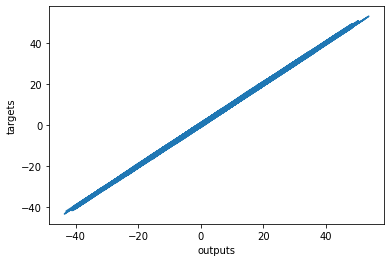

In [12]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()